In [12]:
import pandas as pd
import pandas as pd
import matplotlib as plt



sim = pd.read_csv("sim_clean.csv")
real = pd.read_csv("real_clean.csv")


In [13]:
print("Sim columns:\n", sim.columns)
print("\nReal columns:\n", real.columns)


Sim columns:
 Index(['year', 'week', 'opponent', 'result', 'team_score', 'opponent_score',
       'period', 'adjusted_offensive_efficiency',
       'adjusted_defensive_efficiency', 'power_rating', 'effective_fg_offense',
       'effective_fg_defense', 'turnover_offense', 'turnover_defense',
       'offensive_rebound_rate', 'defensive_rebound_rate_allowed',
       'free_throw_rate', 'free_throw_rate_allowed', 'adjusted_tempo'],
      dtype='object')

Real columns:
 Index(['team', 'conf', 'g', 'w', 'adjoe', 'adjde', 'barthag', 'efg_o', 'efg_d',
       'tor', 'tord', 'orb', 'drb', 'ftr', 'ftrd', '2p_o', '2p_d', '3p_o',
       '3p_d', 'adj_t', 'wab', 'postseason', 'seed', 'year'],
      dtype='object')


In [14]:
real = real.rename(columns={
    "adjoe": "adjusted_offensive_efficiency",
    "adjde": "adjusted_defensive_efficiency",
    "barthag": "power_rating",
    "efg_o": "effective_fg_offense",
    "efg_d": "effective_fg_defense",
    "tor": "turnover_offense",
    "tord": "turnover_defense",
    "orb": "offensive_rebound_rate",
    "drb": "defensive_rebound_rate_allowed",
    "ftr": "free_throw_rate",
    "ftrd": "free_throw_rate_allowed",
    "adj_t": "adjusted_tempo"
})


In [15]:
common_cols = [
    "adjusted_offensive_efficiency", "adjusted_defensive_efficiency",
    "power_rating", "effective_fg_offense", "effective_fg_defense",
    "turnover_offense", "turnover_defense", "offensive_rebound_rate",
    "defensive_rebound_rate_allowed", "free_throw_rate",
    "free_throw_rate_allowed", "adjusted_tempo"
]

sim_compare = sim[common_cols].copy()
real_compare = real[common_cols].copy()


sim_compare["source"] = "simulated"
real_compare["source"] = "real"


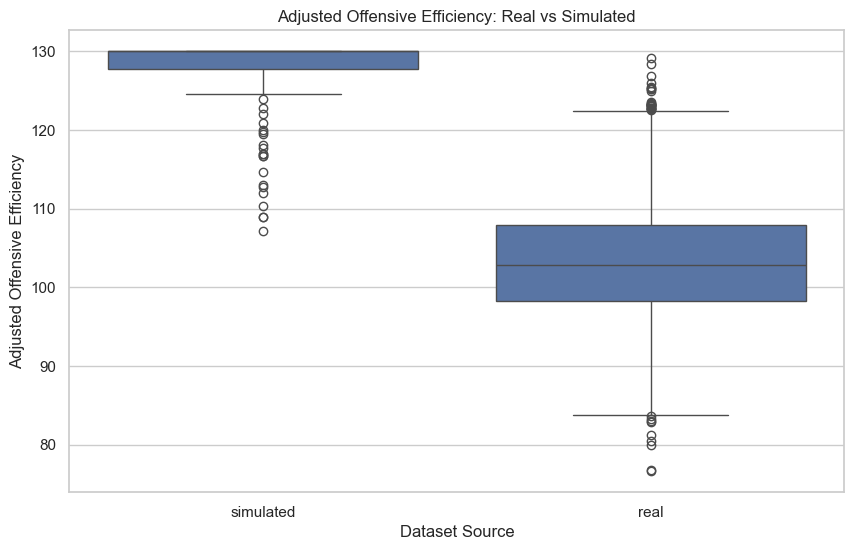

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the datasets into one for easier plotting
combined = pd.concat([sim_compare, real_compare], ignore_index=True)

# Set plot style
sns.set(style="whitegrid")

# Create the first boxplot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x="source", y="adjusted_offensive_efficiency", data=combined)
plt.title("Adjusted Offensive Efficiency: Real vs Simulated")
plt.ylabel("Adjusted Offensive Efficiency")
plt.xlabel("Dataset Source")
plt.show()


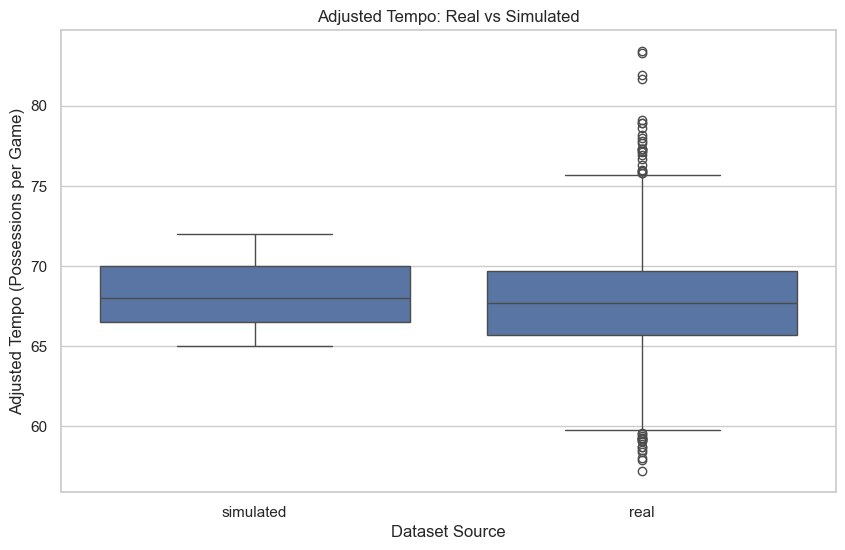

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="source", y="adjusted_tempo", data=combined)
plt.title("Adjusted Tempo: Real vs Simulated")
plt.ylabel("Adjusted Tempo (Possessions per Game)")
plt.xlabel("Dataset Source")
plt.show()


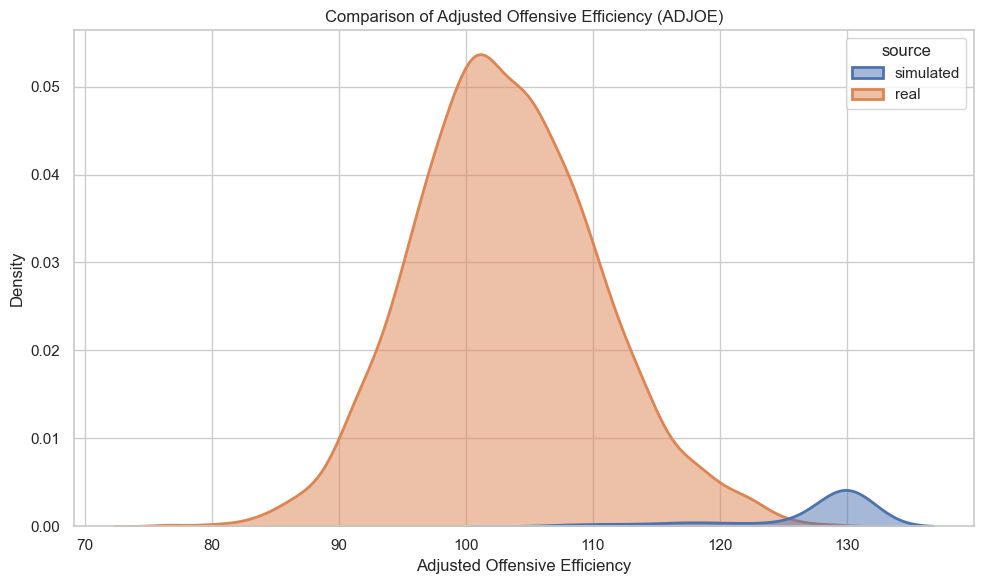

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined, x='adjusted_offensive_efficiency', hue='source', fill=True, alpha=0.5, linewidth=2)
plt.title("Comparison of Adjusted Offensive Efficiency (ADJOE)")
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\kazuk\AppData\Local\Temp\ipykernel_14992\3986210207.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_points_df, x='Dataset', y='Avg_Points_Scored',


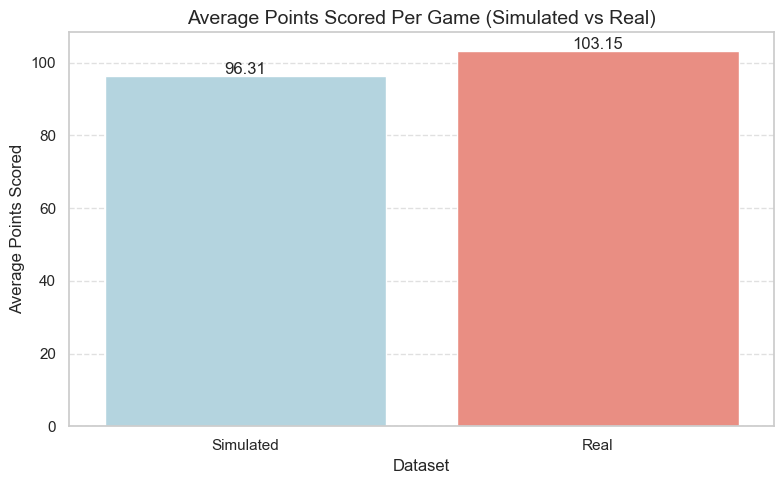

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load cleaned files
sim = pd.read_csv("sim_clean.csv")
real = pd.read_csv("real_clean.csv")

# Step 1: Calculate average points
sim_avg_pts = sim['team_score'].mean()
real_avg_pts = real['adjoe'].mean()

# Step 2: Create a comparison DataFrame
avg_points_df = pd.DataFrame({
    'Dataset': ['Simulated', 'Real'],
    'Avg_Points_Scored': [sim_avg_pts, real_avg_pts]
})

# Step 3: Plot with distinct colors and added labels
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_points_df, x='Dataset', y='Avg_Points_Scored', 
            palette=['lightblue', 'salmon'])

plt.title("Average Points Scored Per Game (Simulated vs Real)", fontsize=14)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Average Points Scored", fontsize=12)
plt.xticks(rotation=0)  # Ensuring labels are horizontal
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Add labels on top of the bars for clarity
for index, row in avg_points_df.iterrows():
    plt.text(index, row['Avg_Points_Scored'] + 0.5, f"{row['Avg_Points_Scored']:.2f}", 
             ha='center', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\kazuk\AppData\Local\Temp\ipykernel_14992\497912666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_def_eff_df, x='Dataset', y='Avg_Adjusted_Defensive_Efficiency',


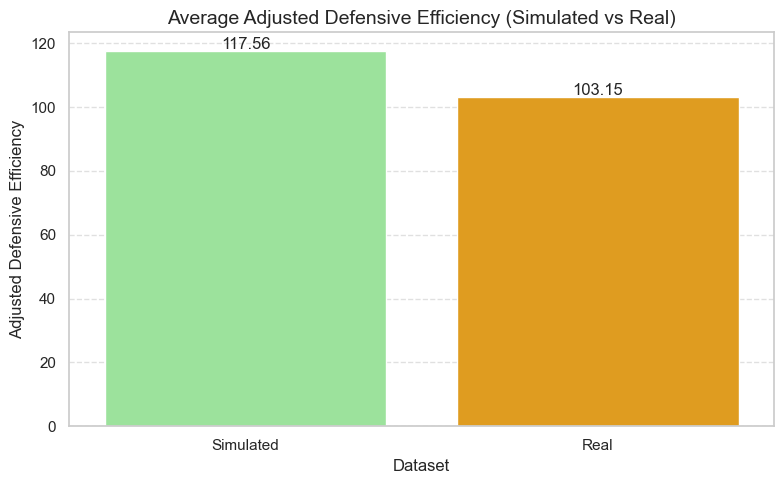

In [33]:
# Step 1: Calculate the average adjusted defensive efficiency for both datasets
sim_avg_def_eff = sim['adjusted_defensive_efficiency'].mean()
real_avg_def_eff = real['adjde'].mean()

# Step 2: Create a comparison DataFrame
avg_def_eff_df = pd.DataFrame({
    'Dataset': ['Simulated', 'Real'],
    'Avg_Adjusted_Defensive_Efficiency': [sim_avg_def_eff, real_avg_def_eff]
})

# Step 3: Plot with distinct colors and added labels
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_def_eff_df, x='Dataset', y='Avg_Adjusted_Defensive_Efficiency', 
            palette=['lightgreen', 'orange'])

plt.title("Average Adjusted Defensive Efficiency (Simulated vs Real)", fontsize=14)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Adjusted Defensive Efficiency", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Add labels on top of the bars for clarity
for index, row in avg_def_eff_df.iterrows():
    plt.text(index, row['Avg_Adjusted_Defensive_Efficiency'] + 0.5, f"{row['Avg_Adjusted_Defensive_Efficiency']:.2f}",
             ha='center', fontsize=12)

plt.tight_layout()
plt.show()
